In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import os 

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

%matplotlib inline

In [2]:
root_dir = os.path.abspath('.')
data_dir = os.path.join(root_dir, 'data')

df = pd.read_csv(os.path.join(data_dir,'movies_metadata.csv' ))

df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [3]:
df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [4]:
#Only keep those features that we require 
df = df[['title','genres', 'release_date', 'runtime', 'vote_average', 'vote_count']]

df.head()

,title,genres,release_date,runtime,vote_average,vote_count
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",1995-10-30,81.0,7.7,5415.0
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",1995-12-15,104.0,6.9,2413.0
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",1995-12-22,101.0,6.5,92.0
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",1995-12-22,127.0,6.1,34.0
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",1995-02-10,106.0,5.7,173.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         45460 non-null  object 
 1   genres        45466 non-null  object 
 2   release_date  45379 non-null  object 
 3   runtime       45203 non-null  float64
 4   vote_average  45460 non-null  float64
 5   vote_count    45460 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.1+ MB


Release Date column has to be converted to datetime column

In [6]:
#Convert release_date into pandas datetime format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

#Extract year from the datetime
df['year'] = df['release_date'].apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         45460 non-null  object        
 1   genres        45466 non-null  object        
 2   release_date  45376 non-null  datetime64[ns]
 3   runtime       45203 non-null  float64       
 4   vote_average  45460 non-null  float64       
 5   vote_count    45460 non-null  float64       
 6   year          45466 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 2.4+ MB


note that year is an object column. have to convert to INT

In [8]:
def convert_int(x):
    try:
        x = int(x)
    except:
        x = 0
    return x

def convert_float(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x



In [9]:
#converting year column to int
df['year'] = df['year'].apply(convert_int)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         45460 non-null  object        
 1   genres        45466 non-null  object        
 2   release_date  45376 non-null  datetime64[ns]
 3   runtime       45203 non-null  float64       
 4   vote_average  45460 non-null  float64       
 5   vote_count    45460 non-null  float64       
 6   year          45466 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 2.4+ MB


Since we have Year column already, we dont need to have release_date column. Hence we can drop releasedata column from the dataset.

In [11]:
df.drop(columns=['release_date'], inplace=True, axis = 1 )

In [12]:
df.head()

,title,genres,runtime,vote_average,vote_count,year
0,Toy Story,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",81.0,7.7,5415.0,1995
1,Jumanji,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",104.0,6.9,2413.0,1995
2,Grumpier Old Men,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",101.0,6.5,92.0,1995
3,Waiting to Exhale,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",127.0,6.1,34.0,1995
4,Father of the Bride Part II,"[{'id': 35, 'name': 'Comedy'}]",106.0,5.7,173.0,1995


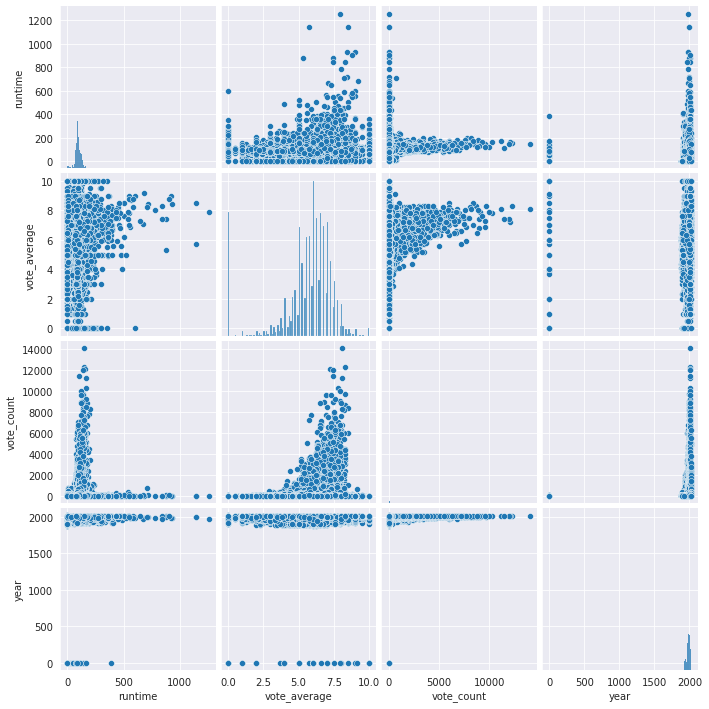

In [13]:
sns.pairplot(df)
plt.show()

In [14]:
df.loc[0]["genres"]

"[{'id': 16, 'name': 'Animation'}, {'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}]"

In [15]:
# let us explode the data on Genre type
from ast import literal_eval

In [16]:
#Convert all NaN into stringified empty lists
df['genres'] = df['genres'].fillna('[]')

#Apply literal_eval to convert to the list object
df['genres'] = df['genres'].apply(literal_eval)

#Convert list of dictionaries to a list of strings
df['genres'] = df['genres'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

df.head()

,title,genres,runtime,vote_average,vote_count,year
0,Toy Story,"[Animation, Comedy, Family]",81.0,7.7,5415.0,1995
1,Jumanji,"[Adventure, Fantasy, Family]",104.0,6.9,2413.0,1995
2,Grumpier Old Men,"[Romance, Comedy]",101.0,6.5,92.0,1995
3,Waiting to Exhale,"[Comedy, Drama, Romance]",127.0,6.1,34.0,1995
4,Father of the Bride Part II,[Comedy],106.0,5.7,173.0,1995


In [17]:
#Create a new feature by exploding genres
s = df.apply(lambda x: pd.Series(x['genres']),axis=1).stack().reset_index(level=1, drop=True)

#Name the new feature as 'genre'
s.name = 'genre'

#Create a new dataframe gen_df which by dropping the old 'genres' feature and adding the new 'genre'.
gen_df = df.drop('genres', axis=1).join(s)

#Print the head of the new gen_df
gen_df.head()
gen_df['genre'] = gen_df['genre'].apply(lambda x: str(x).lower())

In [18]:
s.head()

0    Animation
0       Comedy
0       Family
1    Adventure
1      Fantasy
Name: genre, dtype: object

In [22]:
def build_chart(gen_df, percentile=0.8):
    #Ask for preferred genres
    print("Input preferred genre")
    genre = str(input()).lower()

    #Ask for lower limit of duration
    print("Input shortest duration")
    low_time = float(input())

    #Ask for upper limit of duration
    print("Input longest duration")
    high_time = float(input())

    #Ask for lower limit of timeline
    print("Input earliest year")
    low_year = int(input())

    #Ask for upper limit of timeline
    print("Input latest year")
    high_year = int(input())

    #Define a new movies variable to store the preferred movies. Copy the contents of gen_df to movies
    movies = gen_df.copy()

    #Filter based on the condition
    movies = movies[(movies['genre'] == genre) & 
                    (movies['runtime'] >= low_time) & 
                    (movies['runtime'] <= high_time) & 
                    (movies['year'] >= low_year) & 
                    (movies['year'] <= high_year)]

    #Compute the values of C and m for the filtered movies
    C = movies['vote_average'].mean()
    m = movies['vote_count'].quantile(percentile)

    #Only consider movies that have higher than m votes. Save this in a new dataframe q_movies
    q_movies = movies.copy().loc[movies['vote_count'] >= m]

    #Calculate score using the IMDB formula
    q_movies['score'] = q_movies.apply(lambda x: (x['vote_count']/(x['vote_count']+m) * x['vote_average']) 
                                       + (m/(m+x['vote_count']) * C)
                                       ,axis=1)

    #Sort movies in descending order of their scores
    q_movies = q_movies.sort_values('score', ascending=False)

    return q_movies.head(15)

In [25]:
build_chart(gen_df, percentile=.65)

Input preferred genre
Animation
Input shortest duration
200
Input longest duration
300
Input earliest year
1980
Input latest year
2000


,title,runtime,vote_average,vote_count,year,genre,score
37524,Area 88,201.0,7.1,5.0,1985,animation,7.1


In [26]:
df.to_csv(data_dir,'movies_metadata_clean.csv')

IsADirectoryError: [Errno 21] Is a directory: '/home/mia/MLPractise/Kaggle/RecommendationSystems/data'